# Reference
* https://stackoverflow.com/questions/49390842/cross-entropy-in-pytorch
* https://discuss.pytorch.org/t/shall-i-pass-hidden-states-to-lstm-or-not/72426

# Load dataset

In [269]:
import pandas as pd
import numpy as np
import mnist_preprocessing as mp
import matplotlib.pyplot as plt
from importlib import reload
import dataset_mnist as dm
import random
from torch.utils.data import DataLoader
import model_mnist as mm
import parameters as P
import train_process as T
reload(P)
reload(mm)
reload(dm)

<module 'dataset_mnist' from '/Users/chiang-en/Documents/GitHub/lstm-example/dataset_mnist.py'>

# Dataset and Dataloader

In [270]:
train_df = pd.read_csv('./ mnist/mnist_train.csv')
test_df = pd.read_csv('./ mnist/mnist_test.csv')
train_dataset, test_dataset = dm.dataset_mnist(train_df), dm.dataset_mnist(test_df)
idx = random.randint(0, len(train_dataset) - 1)
train_dataloader = DataLoader(dataset = train_dataset, batch_size=P.BATHCH_SIZE)
test_dataloader = DataLoader(dataset = test_dataset, batch_size=P.BATHCH_SIZE)

In [264]:
# a = train_dataset[90]['label']
# torch.argmax(a).item()
# train_dataset.show(idx+1000)

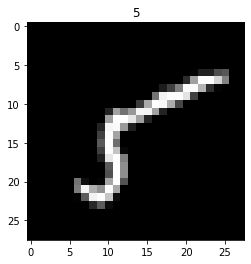

In [271]:
train_dataset.show(idx)
plt.show()
# idx = random.randint(0, len(test_dataset) - 1)
# test_dataset.show(idx)

# Define a model

In [274]:
reload(mm)
reload(T)
reload(dm)
reload(P)
import torch.optim as optim
import torch.nn as nn
import torch
# the model
model = mm.model_mnist()
# optim and loss function
optimizer = optim.Adam(model.parameters())
loss_fn = nn.CrossEntropyLoss()
T.train(model,P.N_EPOCHS,optimizer,loss_fn,train_dataloader,test_dataloader)

train acc:0.9304166666666667, test acc:0.9581
train acc:0.9684, test acc:0.9729
train acc:0.9754666666666667, test acc:0.9743


KeyboardInterrupt: 

In [254]:
input = torch.randn((2, 28, 28))
output = model(input)
print('output size = ', output.size())
print('output = ', output)
print(torch.argmax(output, dim=1))

output size =  torch.Size([2, 10])
output =  tensor([[ 0.0886,  0.1307, -0.0489, -0.1229, -0.0558,  0.1294, -0.1450, -0.1240,
          0.0790, -0.1897],
        [ 0.0285, -0.0762, -0.0902, -0.0791,  0.0265,  0.1079,  0.1130, -0.2059,
          0.2848, -0.0210]], grad_fn=<AddmmBackward0>)
tensor([1, 8])


In [154]:
import torch.nn as nn
import torch
loss_fn = nn.MSELoss()
a = loss_fn(torch.randn(10,1), torch.randn(10,1)).item()
type(a)

float

In [258]:
(torch.Tensor([1, 4, 1])==torch.Tensor([1, 2, 1])).sum().item()

2

In [233]:
import math
f = nn.CrossEntropyLoss()
softmax = nn.Softmax(dim=1)
N = 3
C = 2
# y_pred = softmax(torch.randn((N, C)))# need not to transform ouputs via softmax
y_pred = torch.randn((N, C))
y_gt = torch.zeros(N).long()
y_gt[0] = 1
print('y_pred = \n', y_pred)
print('y_gt = ', y_gt,'\n')
print('ce_torch = ', f(y_pred, y_gt))
ce = 0
y_pred_softmax = softmax(y_pred)
for i in range(N):
    l = y_gt[i].item()
    v = y_pred_softmax[i, l].item()
    
    ce = ce -math.log(v)

print('ce = ', ce/N)

y_pred = 
 tensor([[-0.0500, -1.0407],
        [-0.3846,  0.0965],
        [ 1.5005, -0.2377]])
y_gt =  tensor([1, 0, 0]) 

ce_torch =  tensor(0.8103)
ce =  0.8102636022590745


In [261]:
train_dataloader.dataset.__len__()

60000

prediction =  tensor([6])


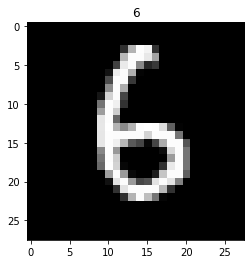

In [299]:
idx = 21
a = test_dataloader.dataset[idx]['features'].unsqueeze_(dim=0).float()
model.eval()
pred = model(a)

pred = torch.argmax(pred, dim=1)
print('prediction = ', pred)

test_dataloader.dataset.show(idx)



In [213]:
softmax(y_pred)

tensor([[0.4442, 0.5558]])

In [302]:
model(torch.zeros((1, , 28)))

RuntimeError: shape '[-1, 448]' is invalid for input of size 944

In [259]:
train_dataset[0]['label'].size()


torch.Size([10, 1])